# Applied  Algorithms HW - 3

## Name: Shubham Narendra Bhagat
## Username: snbhagat

# Problem 1:
Modify the second program to allow for the sum of reciprocals. For example, when given a list of numbers 1,2,3,4, 5 then the sum would be 1/1 + 1/2 + 1/3 + 1/4 + 1/5 = 2.283. When adding this function, add it locally and use the other sum function and use an inline lambda function that maps x to 1/x. You can assume zero is never in the list.

### Approach:
 - Here, I am using map function which takes two arguments. The first argument is a lambda function which takes input 'x1' and returns the reciprocal of x1(i.e- 1/x1). The second argument to the map function is a iterable object, basically our list.
 - The map() function is going to apply the lambda function on every element of list one by one and will return an iterable map object. Then I am coverting this map object to a list and passing that list to s1() function.
 - s1() function will now return sum of reciprocals.

In [2]:

def f(*x, **y):
    def s1(x): 
        s=0 
        if x:
            for i in x:
                s += i
        return s

    def p1(x): 
        s=1 
        if x:
            for i in x:
                s *= i
        return s

    def s2(x):
        return s1(list(map(lambda x1: x1**-1, x)))

    if y["action"] == "sum":
        return s1(*x)
    elif y["action"] == "prod":
        return p1(*x)
    elif y["action"] == "reciprocal sum":
        return s2(*x)
    else:
        return f"bad argument: {y}"
if __name__ == '__main__':
    xlst = [1,2,3,4,5]
    print(f(xlst, action = "sum"))
    print(f(xlst, action = "prod"))
    print(f(xlst, action = "reciprocal sum"))


15
120
2.283333333333333


***

# Problem 2

Using how to read in console information in problem 2, modify the first program so that it can be executed from the console using a list of numbers and the operation. You should not modify the original function–simply add script to read in data from the console.

### Approach:
 - Here, we are using argparse module to take command line input. The first step in using the argparse is creating an ArgumentParser object.
 - Next, using *add\_argument()* method, we are specifying arguments that tell us how the input should be processed. For example in the below program, argument "-lst" having attribute "nargs = +" tells us that any input after -lst operand in command line should be parsed as a list. Moreover, attribute "type=int" tells us that it will take list of integers.
 - Similarly, "-op" argument tells us that input after -op argument should be a string having values- sum, prod or rec.
 - *parse_args()* will create a dictionary where keys will be the arguments ie: -lst or -op in our program and values will be the input that we specify after those arguments in the command line.
 - Thus args.lst will be the list of integers and args.op will have name of opeartion to perform.


In [ ]:
import argparse
def f(*x, **y):
    def s1(x): 
        s=0 
        if x:
            for i in x:
                s += i
        return s

    def p1(x): 
        s=1 
        if x:
            for i in x:
                s *= i
        return s

    def s2(x):
        return s1(list(map(lambda x1: x1**-1, x)))

    if y["action"] == "sum":
        return s1(*x)
    elif y["action"] == "prod":
        return p1(*x)
    elif y["action"] == "rec":
        return s2(*x)
    else:
        return f"bad argument: {y}"


if __name__ == '__main__':
    
    parser = argparse.ArgumentParser() 
    parser.add_argument('-lst', nargs='+', type=int, default = ['1'], help="List of ←􏰀 numbers")
    parser.add_argument('-op', default = 'sum', help = "sum, prod, rec")

    args = parser.parse_args()


    print(f(args.lst, action = args.op))
    


#### Problem 2 output in Terminal :


<br>
<div>
    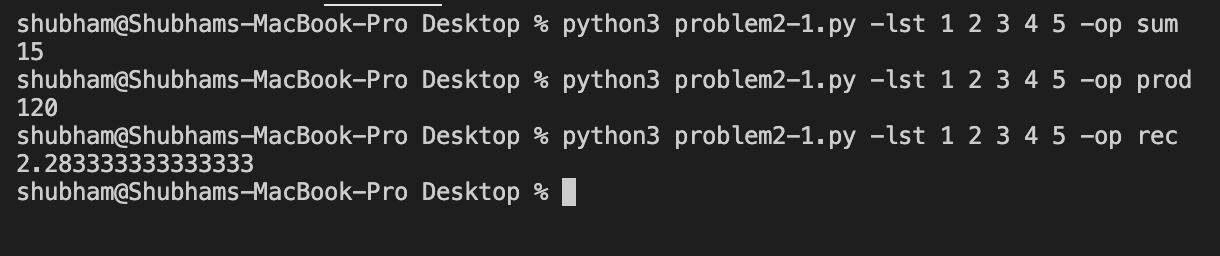
</div>

***

# Problem 3

Add multiplication to the Python class overload asterisk.

## Approach
 - Here, I am overiding *\_\_mul\_\_()* method inside class complex_. So whenever we try to multiple objects of class- complex_ , the overridden *\_\_mul\_\_()* method will be called implicitly.
 - Hence for statement w * x * y * z, where w, x, y, z are objects of class complex_, the overridden *\_\_mul\_\_()* method is called.


In [1]:
class complex_:
    def __init__(self, re=0, im=0):
        self.re = re
        self.im = im
    
    def get_re(self):
        return self.re

    def get_im(self):
        return self.im

    def __str__(self):
        g = lambda x: "+" if x>=0 else ""
        return f"({self.re}{g(self.im)}{self.im}i)"

    def cadd(self, other):
        new_re = self.get_re() + other.get_re()
        new_im = self.get_im() + other.get_im()
        return complex_(new_re, new_im)

    def __add__(self, other):
        new_re = self.get_re() + other.get_re()
        new_im = self.get_im() + other.get_im()
        return complex_(new_re, new_im)
    
    def cmul(self, other):
        new_re = (self.get_re() * other.get_re()) - (self.get_im() * other.get_im()) 
        new_im = (self.get_re()* other.get_im() + (self.get_im() * other.get_re()))
        return complex_(new_re, new_im)

    def __mul__(self, other):
        new_re = (self.get_re() * other.get_re()) - (self.get_im() * other.get_im()) 
        new_im = (self.get_re()* other.get_im() + (self.get_im() * other.get_re()))
        return complex_(new_re, new_im)

if __name__ == '__main__':

    w = complex_(1,-3)
    x = complex_(-1,3)
    y = complex_(1,3)
    z = complex_(-1,-3)
    print(w)
    print(x)
    print(y)
    print(z)

    print("\ncalling cadd()")
    print(w.cadd(x).cadd(y).cadd(z))

    print("\nmanual addtion")
    print((1-3j) + (-1+3j) + (1+3j) + (-1-3j)) 

    print("\ncalling overloded __add__()")
    print(w + x + y + z)
    
    print("\ncalling cmul()")
    print(w.cmul(x).cmul(y).cmul(z))

    print("\ncalling overload __mul__()")
    print(w*x*y*z)
  

(1-3i)
(-1+3i)
(1+3i)
(-1-3i)

calling cadd()
(0+0i)

manual addtion
0j

calling overloded __add__()
(0+0i)

calling cmul()
(100+0i)

calling overload __mul__()
(100+0i)


***
<br>

# Problem 4 
Perform an experimental analysis over the three algorithms, average1, average2, aver- age3. In a log-log chart, visualize their running times as a function of the input size.

### Approach
 - To calculate the time taken by each algorithm, I have imported _"timeit"_ module to calculate the runtime of each algorithm.
 - First I am calling a for-loop in range 10 to 100 with step-size of 10. Then creating a list of elements for each iteration and passing that list to each method call for algorithm 1 algorithm 2 and algorithm 3.
 - So I am recording the runtime of all three algorithms for input size n in range 10 to 100, where n increases by 10 in each iteration. It is observed that when we rank all three algorithms in ascending order of runtime, we get the following order:
     - Algorithm3 (average3())
     - Algorithm2 (average2())
     - Algorithm1 (average1())

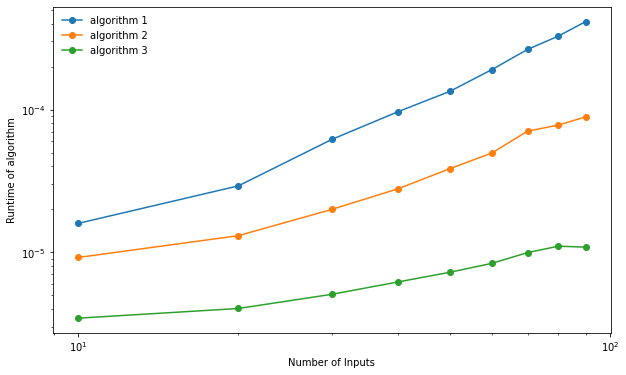

In [9]:
import timeit
import matplotlib.pyplot as plt



def average1(S):
    #S:sequence  
    n = len(S)
    my_average = [0] * n
    for j in range(n):
        total = 0
        for i in range(j + 1):
            total += S[i]
        my_average[j] = total / (j+1) 
    return my_average

def average2(S):
    #S:sequence
    n = len(S)
    my_average= [0] * n
    for j in range(n):
        my_average[j] = sum(S[0:j+1]) / (j+1)
    return my_average

def average3(S):
    #S:sequence
    n = len(S)
    my_average = [0] * n
    total = 0
    for j in range(n):
        total += S[j]
    my_average[j] = total / (j+1)
    return my_average

if __name__ == '__main__':

    runtime1 = {}
    runtime2 = {}
    runtime3 = {}
    for i in range(10,100, 10):
        runtime1[i] = timeit.timeit('average1(list(range(i)))', globals = globals(), number = 1)
        runtime2[i] = timeit.timeit('average2(list(range(i)))', globals = globals(), number = 1)
        runtime3[i] = timeit.timeit('average3(list(range(i)))', globals = globals(), number = 1)

plt.xlabel("Number of Inputs")
plt.ylabel("Runtime of algorithm")
plt.rcParams['figure.figsize'] = (10,6)
plt.yscale('log')
plt.xscale('log')
plt.plot(runtime1.keys(),runtime1.values(), marker = 'o', label = 'algorithm 1')
plt.plot(runtime1.keys(),runtime2.values(), marker = 'o', label = 'algorithm 2')
plt.plot(runtime1.keys(),runtime3.values(), marker = 'o', label = 'algorithm 3')
plt.legend(loc="upper left", frameon=False)
plt.show()






# Problem 5
Perform an experimental analysis to determine the largest value of input size such that the given algorithm runs in less than 45 seconds.



### Algorithm 1:
 - The approach is kind of a brute-force method where I am providing a list of numbers and increase the elements of list in each iteration util the runtime crosses 45 secs.
 - Here, I am using a while loop which runs until runtime is less than or equal to 45. Then I am creating a list where the number of elements increases by 2555; and then I am calculating the runtime using *timeit* method of timeit module for that list of numbers.
 - As the runtime crosses 40 secs, I am reducing the step-size of list to 1250 for increased accuracy. The step-size 2555 and 1250 where taken on experimental basis by trial and error.
 - One thing to note is that output in terminal and in jupyter notebook varies. Furthermore, the output may also vay depending on the number of background process running.
 - **The maximum number of input here is just an approximate number**

In [10]:
import timeit

def algorithm1( S):
    #S:sequence
    for j in range(len(S)):
        for k in range(j+1, len(S)):
             if S[j] == S[k]:
                return False
    return True

if __name__ == '__main__':
    
    no_of_elements = 1000
    print("Input Size |   Runtime")
    print("-------------------------")
    runtime = 0
    while(runtime <= 45):
        if (runtime > 40):
            no_of_elements += 1250
        else:
            no_of_elements +=2555
        runtime = round(timeit.timeit('algorithm1(lst)',setup= 'lst = list(range(no_of_elements))',globals = globals(), number = 1),5)
        print(no_of_elements, "\t   |  ", runtime)
        
    print("Maximum number of inputs for algorithm 1 to execute in less than 45 secs: ~",no_of_elements - 1250)

Input Size |   Runtime
-------------------------
3555 	   |   0.44988
6110 	   |   1.21686
8665 	   |   2.46465
11220 	   |   4.11973
13775 	   |   6.19956
16330 	   |   8.72428
18885 	   |   11.68553
21440 	   |   15.13598
23995 	   |   18.9202
26550 	   |   23.25228
29105 	   |   28.13268
31660 	   |   33.25164
34215 	   |   38.81783
36770 	   |   44.88144
38020 	   |   47.95462
Maximum number of inputs for algorithm 1 to execute in less than 45 secs: ~ 36770


#### Algorithm 1 output in Terminal :
<div>
    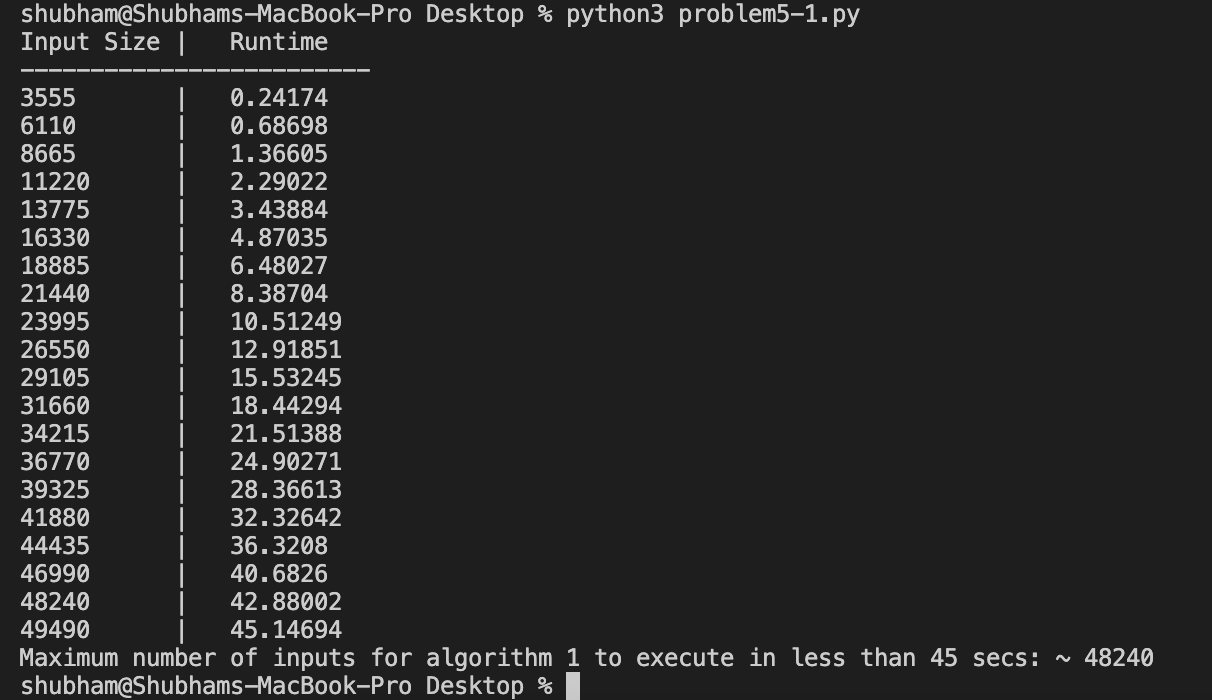
</div>

***

## Problem 5: Algorithm 2

 - The approach for algorithm 2 is same as algorithm 1. The difference here is that since algorithm 2 runs in linear time, the step-size here is *15000000* and *7500000*. 
 - Again these numbers for step size are taken on experimental basis through trial and error. Here also, the output varies depending on the terminal or runtime environment.

In [14]:
import timeit
def algorithm2(S):
    #S:sequence
    S= sorted(S)
    for j in range(1, len(S)):
        if S[j-1] == S[j]:
                    return False
    return True

if __name__ == '__main__':
    
    no_of_elements = 1000000
    print("Input Size      |   Runtime")
    print("-------------------------------")
    runtime = 0
    while(runtime <= 45):
        if (runtime > 40):
            no_of_elements += 7500000
        else:
            no_of_elements += 15000000
        runtime = round(timeit.timeit('algorithm2(lst)',setup= 'lst = list(range(no_of_elements))',globals = globals(), number = 1),4)
        print(no_of_elements, "\t|  ", runtime)    
        
    
    print("\nMaximum number of inputs for algorithm 2 to execute in less than 45 secs: ~",no_of_elements-7500000)

Input Size      |   Runtime
-------------------------------
16000000 	|   1.6159
31000000 	|   3.1228
46000000 	|   4.7071
61000000 	|   6.1893
76000000 	|   7.4724
91000000 	|   9.1262
106000000 	|   10.6449
121000000 	|   12.321
136000000 	|   13.7843
151000000 	|   15.286
166000000 	|   16.6011
181000000 	|   19.3738
196000000 	|   21.5661
211000000 	|   26.6261
226000000 	|   32.6906
241000000 	|   41.7645
248500000 	|   44.9844
256000000 	|   47.9426

Maximum number of inputs for algorithm 2 to execute in less than 45 secs: ~ 248500000


#### Algorithm 2 output in Terminal : 
<br>

<div>
    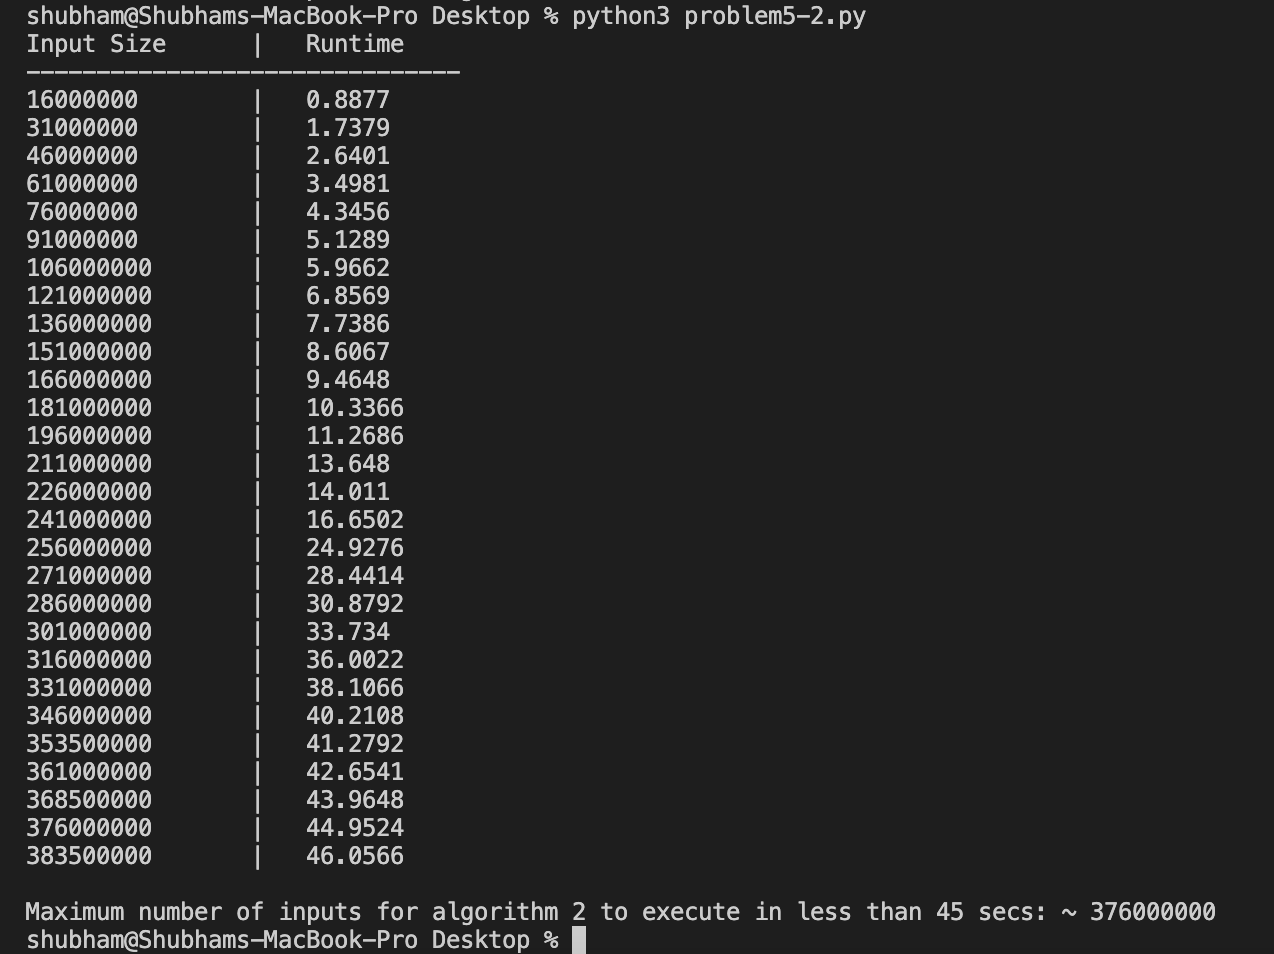
</div>    

***

## Problem 5: Algorithm 3
 - Again the approach to calculate the runtime is same as Algorithm1 and Algorithm2. However, since the Algorithm3 uses recursion, I had to keep the step-size of list to as low as *1* and *2*.
 - Initially, my kernel was crashing for algorithm 3. But then looking carefully at the recursion, I realized that I should start with small input and small step-size.

In [13]:
import timeit

def algorithm3(S, start, stop):
    #slice S[start:stop],  S:sequence
    if stop - start <= 1: return True
    elif not algorithm3(S, start, stop-1): return False
    elif not algorithm3(S, start+1, stop): return False
    else: return S[start] != S[stop-1]

if __name__ == '__main__':
    

    no_of_elements = 10
    print("Input Size |   Runtime")
    print("-------------------------")
    runtime = 0
    while(runtime <= 45):
        if (runtime > 6):
            no_of_elements += 1
        else:
            no_of_elements +=2
        runtime = round(timeit.timeit('algorithm3(lst, 0, no_of_elements)',setup= 'lst = list(range(no_of_elements))',globals = globals(), number = 1),4)
        print(no_of_elements, "\t   |  ", runtime)
    
    print("\nMaximum number of inputs for algorithm 3 to execute in less than 45 secs: ~",no_of_elements-1)
    

Input Size |   Runtime
-------------------------
12 	   |   0.002
14 	   |   0.0064
16 	   |   0.0164
18 	   |   0.0528
20 	   |   0.1377
22 	   |   0.5495
24 	   |   2.1839
26 	   |   10.2085
27 	   |   18.9741
28 	   |   36.7415
29 	   |   72.3734

Maximum number of inputs for algorithm 3 to execute in less than 45 secs: ~ 28


# Algorithm 3 output in Terminal:
<br>
<div>
    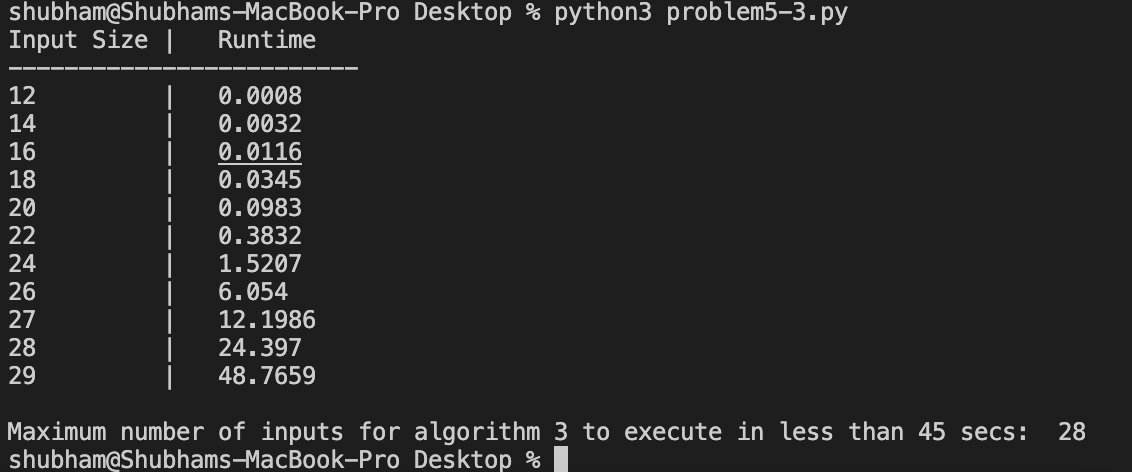
</div>